<img src="mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Data preprocessing</center>

# Challenge S6: Análisis y visualización de texto

## Objetivo

El objetivo de este challenge es a construir un análisis de opiniones con un dataset que contiene:

* Opiniones con contenido positivo
* Opiniones con contenido negativo

Para ello vamos a utilizar un dataset, o corpus, de texto. Constuiremos nuestro WordCloud con estos datos preprocesando el texto previamente.

## Configuración del entorno

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
#rcParams['figure.figsize'] = (16, 9)
rcParams.update({'font.size': 14})
from wordcloud import WordCloud

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist

stopwords = stopwords.words('english')

## Carga de datos

En este caso las reviews etiquetadas se encuentran en un fichero txt (`reviews.txt`) que contiene una línea por cada review y tiene la siguiente estructura `(0|1)<TABULADOR>texto`:

In [2]:
reviews_pos = []
reviews_neg = []
separadores = [',', '.', ';', ':', '?', '¿', '!', '¡','...','..']

with open('reviews.txt', 'r', encoding='utf-8') as file:
    for line in file:
        trozos = line.split('\t')
        
        if trozos[0] == '0':
            # Negativos
            reviews_neg.append(trozos[1].lower())
        elif trozos[0] == '1':
            # Positivos
            reviews_pos.append(trozos[1].lower())

In [3]:
print(reviews_pos[0:5])

['the da vinci code book is just awesome.\n', "this was the first clive cussler i've ever read, but even books like relic, and da vinci code were more plausible than this.\n", 'i liked the da vinci code a lot.\n', 'i liked the da vinci code a lot.\n', "i liked the da vinci code but it ultimatly didn't seem to hold it's own.\n"]


In [4]:
print(reviews_neg[0:5])

['da vinci code was a terrible movie.\n', 'then again, the da vinci code is super shitty movie, and it made like 700 million.\n', 'the da vinci code comes out tomorrow, which sucks.\n', 'i thought the da vinci code movie was really boring.\n', "god, yahoo games has this truly-awful looking da vinci code-themed skin on it's chessboard right now.\n"]


## Limpieza de signos
La primera función a implementar una función que nos filtre las reviews completas sin signos de puntuación:

In [5]:
def filtrar_review(review):
    review_limpia = ""
    '''
    Filtra un review devolviendo una review "limpio"
    '''
     # IMPLEMENTA AQUÍ TU CÓDIGO

# palabras = word_tokenize(review)

# Elegimos RegexpTokenizer ya que el word_tokenize en las contraccioes como didn't o won't muy comunes
# en inglés esta considerenadolas como dos palabras distintas. Además con esta expresión regular eliminamos
# todos o por lo menos gran parte de los simbolos de puntuación, parentesís interrogaciones y demás.

    tokenizer = RegexpTokenizer("[\w']+")
    palabras=tokenizer.tokenize(review)
    review_limpia= ' '.join(palabras)
    
#   print(palabras)
    
#     palabras_filtradas=[]
#     for palabra in palabras:
#         if palabra in separadores:
#             pass
#         else:
#            palabras_filtradas.append(palabra)
            
#     review_limpia= ' '.join(palabras_filtradas)
    
    return review_limpia

In [6]:
reviews_pos_filtradas = [filtrar_review(x) for x in reviews_pos]
print(reviews_pos_filtradas[0:5])

['the da vinci code book is just awesome', "this was the first clive cussler i've ever read but even books like relic and da vinci code were more plausible than this", 'i liked the da vinci code a lot', 'i liked the da vinci code a lot', "i liked the da vinci code but it ultimatly didn't seem to hold it's own"]


In [7]:
reviews_neg_filtradas = [filtrar_review(x) for x in reviews_neg]
print(reviews_neg_filtradas[0:5])

['da vinci code was a terrible movie', 'then again the da vinci code is super shitty movie and it made like 700 million', 'the da vinci code comes out tomorrow which sucks', 'i thought the da vinci code movie was really boring', "god yahoo games has this truly awful looking da vinci code themed skin on it's chessboard right now"]


## Obtención de palabras
El siguiente paso de nuestro pipeline es convertir las reviews en palabras separadas:

In [8]:
def obtener_palabras(review):
    '''
    Realiza la separación en palabras de un review devolviendo una lista de palabras.
    '''
    palabras_review = []
    #palabras_review = word_tokenize(review)
    
    tokenizer = RegexpTokenizer("[\w']+")
    palabras_review=tokenizer.tokenize(review)
    
    
    # IMPLEMENTA AQUÍ TU CÓDIGO

    return palabras_review

In [9]:
palabras_positivas = []
for t in reviews_pos_filtradas:
    palabras_positivas.extend(obtener_palabras(t))
    
print("palabras_positivas: " + str(len(palabras_positivas)))
print(palabras_positivas[0:50])

palabras_positivas: 41533
['the', 'da', 'vinci', 'code', 'book', 'is', 'just', 'awesome', 'this', 'was', 'the', 'first', 'clive', 'cussler', "i've", 'ever', 'read', 'but', 'even', 'books', 'like', 'relic', 'and', 'da', 'vinci', 'code', 'were', 'more', 'plausible', 'than', 'this', 'i', 'liked', 'the', 'da', 'vinci', 'code', 'a', 'lot', 'i', 'liked', 'the', 'da', 'vinci', 'code', 'a', 'lot', 'i', 'liked', 'the']


In [10]:
palabras_negativas = []
for t in reviews_neg_filtradas:
    palabras_negativas.extend(obtener_palabras(t))
    
print("palabras_negativas: " + str(len(palabras_negativas)))
print(palabras_negativas[0:50])

palabras_negativas: 34790
['da', 'vinci', 'code', 'was', 'a', 'terrible', 'movie', 'then', 'again', 'the', 'da', 'vinci', 'code', 'is', 'super', 'shitty', 'movie', 'and', 'it', 'made', 'like', '700', 'million', 'the', 'da', 'vinci', 'code', 'comes', 'out', 'tomorrow', 'which', 'sucks', 'i', 'thought', 'the', 'da', 'vinci', 'code', 'movie', 'was', 'really', 'boring', 'god', 'yahoo', 'games', 'has', 'this', 'truly', 'awful', 'looking']


## Filtrar palabras
Una vez obtenidas las palabras debemos filtrar todas las palabras que no aporte información relevante al resultado. Acuérdate de filtrar también los signos de puntuación que puedan haber:

In [11]:
def filtrar_palabras(palabras):
    ''' 
    Elimina de la lista de entrada las palabras no deseadas
    Devuelve una lista de palabras filtradas.
    '''
    out = []
    # IMPLEMENTA AQUÍ TU CÓDIGO
    for palabra in palabras:
        if palabra in stopwords: #Eliminamos stopwprds del idioma Inglés que se configuro al inicio.
            pass
        elif palabra in separadores: # Volvemos a eliminar simbolos de putuacón por si quedara alguno
            pass
        else:
            out.append(palabra)

    return out

In [12]:
palabras_positivas_filtradas = filtrar_palabras(palabras_positivas)

print("palabras_positivas_filtradas: " + str(len(palabras_positivas_filtradas)))
print(palabras_positivas_filtradas[0:50])

palabras_positivas_filtradas: 25787
['da', 'vinci', 'code', 'book', 'awesome', 'first', 'clive', 'cussler', "i've", 'ever', 'read', 'even', 'books', 'like', 'relic', 'da', 'vinci', 'code', 'plausible', 'liked', 'da', 'vinci', 'code', 'lot', 'liked', 'da', 'vinci', 'code', 'lot', 'liked', 'da', 'vinci', 'code', 'ultimatly', 'seem', 'hold', "that's", 'even', 'exaggeration', 'midnight', 'went', 'wal', 'mart', 'buy', 'da', 'vinci', 'code', 'amazing', 'course', 'loved']


In [13]:
palabras_negativas_filtradas = filtrar_palabras(palabras_negativas)

print("palabras_negativas_filtradas: " + str(len(palabras_negativas_filtradas)))
print(palabras_negativas_filtradas[0:50])

palabras_negativas_filtradas: 22022
['da', 'vinci', 'code', 'terrible', 'movie', 'da', 'vinci', 'code', 'super', 'shitty', 'movie', 'made', 'like', '700', 'million', 'da', 'vinci', 'code', 'comes', 'tomorrow', 'sucks', 'thought', 'da', 'vinci', 'code', 'movie', 'really', 'boring', 'god', 'yahoo', 'games', 'truly', 'awful', 'looking', 'da', 'vinci', 'code', 'themed', 'skin', 'chessboard', 'right', 'da', 'vinci', 'code', 'suck', 'better', 'know', 'da', 'vinci', 'code']


## Wordclouds

Vamos a dar un primer vistazo a los resultados. Construye un wordcloud para sentimiento positivo, uno para sentimiento negativo y otro que combine ambos tipos de palabras. 

Recuerda que wordcloud espera que le pases las palabras separadas por espacios en una misma cadena. Para ello, ayúdate de `join`: `palabras_positivas_juntas = ' '.join(palabras_positivas)`

### Wordcloud de sentimientos positivos

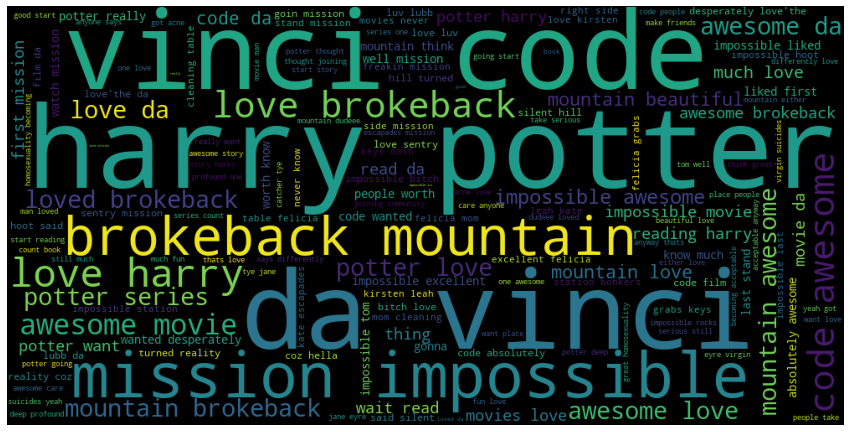

In [14]:
# IMPLEMENTA AQUÍ TU CÓDIGO
palabras_positivas_juntas = ' '.join(palabras_positivas_filtradas)
wordcloud = WordCloud(width = 1000, height = 500, relative_scaling = 0.5).generate(palabras_positivas_juntas)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Wordcloud de sentimientos negativos

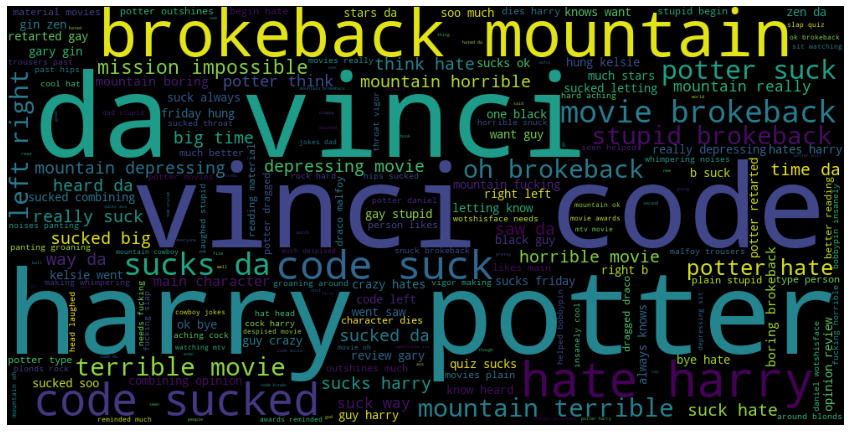

In [15]:
# IMPLEMENTA AQUÍ TU CÓDIGO
palabras_negativas_juntas = ' '.join(palabras_negativas_filtradas)
wordcloud = WordCloud(width = 1000, height = 500, relative_scaling = 0.5).generate(palabras_negativas_juntas)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Wordcloud de ambos sentimientos

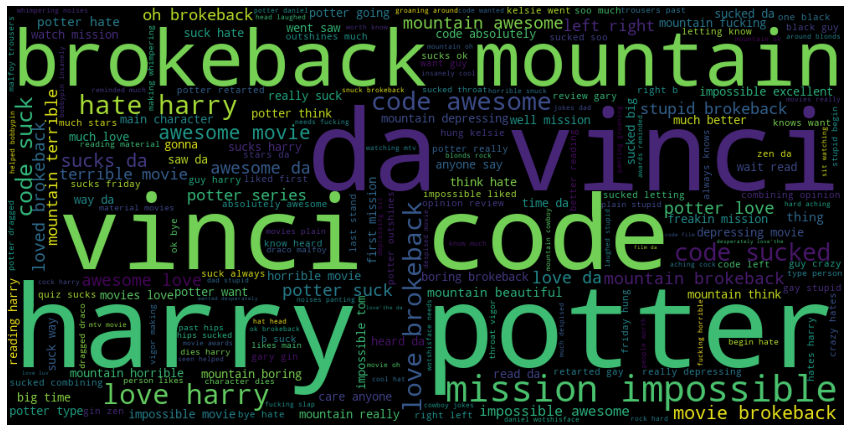

In [16]:
# IMPLEMENTA AQUÍ TU CÓDIGO
palabras_negativas_positivas_juntas= palabras_negativas_juntas + ' ' +  palabras_positivas_juntas
wordcloud = WordCloud(width = 1000, height = 500, relative_scaling = 0.5).generate(palabras_negativas_positivas_juntas)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

* ¿Qué te parecen los resultados?

    * A primera vista se destacan las mismas palabras "vinci", "code", "harry", "poter", "brokeback", "mountain", ...,etc tanto en la selección de positivas como de negativas. Estas palabras componen los títulos de las películas sobre las que se realizan las opiniones. Realmente estas palabras no reflejan ningún sentimiento ni positivo ni negativo.
    
* ¿Qué crees que se podría mejorar?

    * Eliminar estas palabras que están distribuidas a la vez, de forma tan significativa, tanto en positivas como en negativas y así dejar las que claramamente desprenden un sentimiento positivo, por que solo están en positivas como a la inversa con las negativas.


## Análisis de frecuencias de reviews negativos y positivos
A partir de las palabras filtradas queremos el conjunto de palabras que nos muestre cuales son las palabras más probables en cada categoría (reviews positivo o negativo).

In [17]:
def calcula_palabras_mas_probables(palabras, n):
    '''
    Devuelve un conjunto con las n palabras más probables
    '''
    conjunto = set()
        
    # IMPLEMENTA AQUÍ TU CÓDIGO
    
    fdist = FreqDist(palabras)
    conjunto=set(fdist.most_common(n))
    
    
    return conjunto

In [18]:
conjunto_positivas = calcula_palabras_mas_probables(palabras_positivas_filtradas, 150)  
print("conjunto_positivas: " + str(len(conjunto_positivas)))
print(conjunto_positivas)


conjunto_positivas: 150
{('wait', 88), ('want', 172), ('2', 86), ("we're", 80), ('differently', 80), ('make', 83), ("love'the", 80), ('books', 23), ('way', 12), ('last', 87), ('says', 81), ('profound', 80), ('joining', 80), ('leah', 80), ('liked', 99), ('suicides', 80), ('awesome', 1126), ('would', 172), ('mission', 999), ('loved', 256), ('da', 999), ('freakin', 81), ('take', 81), ('movies', 192), ('thats', 81), ('dash', 80), ('either', 81), ('miss', 9), ('things', 84), ('even', 12), ('homosexuality', 80), ('see', 21), ('cleaning', 80), ('one', 181), ('hella', 80), ('jane', 80), ('deep', 80), ('think', 90), ('excellent', 86), ('potter', 1085), ('worth', 82), ('love', 1534), ('becoming', 80), ('silent', 80), ('luv', 82), ('film', 89), ('went', 25), ('saw', 18), ('mom', 83), ('catcher', 80), ('already', 10), ('dudeee', 80), ('like', 951), ('kate', 80), ('place', 82), ('pretty', 19), ('care', 81), ('never', 84), ('watch', 86), ('well', 91), ('read', 101), ('acne', 80), ("'", 84), ('much',

In [19]:
conjunto_negativas = calcula_palabras_mas_probables(palabras_negativas_filtradas, 150)    
    
print("conjunto_negativas: " + str(len(conjunto_negativas)))
print(conjunto_negativas)

conjunto_negativas: 150
{('mtv', 80), ('potter', 1006), ('went', 90), ('hates', 82), ('draco', 80), ('iii', 17), ("there's", 83), ('mission', 94), ('gary', 80), ('brokeback', 999), ('right', 163), ('kinda', 14), ('plain', 80), ('head', 81), ('seen', 89), ('black', 80), ('really', 188), ('gay', 89), ('things', 9), ('quiz', 80), ('oh', 162), ('pretty', 13), ('hips', 80), ('bye', 80), ('crazy', 80), ('dragged', 80), ('awards', 80), ('past', 81), ('main', 81), ('evil', 30), ('suck', 276), ('5', 80), ('fucking', 169), ('insanely', 80), ('would', 9), ('much', 264), ('da', 1001), ('way', 89), ('harry', 1003), ('god', 9), ('needs', 81), ('opinion', 82), ('rock', 80), ('trousers', 80), ('bobbypin', 80), ('blonds', 80), ('said', 10), ('retarted', 80), ('heard', 95), ('cowboy', 80), ('book', 10), ('zen', 80), ('code', 1000), ('malfoy', 80), ('2', 97), ('type', 80), ('hat', 80), ('gin', 80), ('throat', 80), ('ass', 24), ('want', 82), ('panting', 80), ('slap', 80), ('cock', 85), ('vinci', 1001), ('

### ¿Se te ocurre cómo mejorarlo?
Como ves existen muchas palabras parecidas, o directamente las mismas, ¿se te ocurre cómo podríamos mejorarlo?. Por ejemplo, podríamos eliminar esas palabras comunes de ambos conjuntos, ya que no aportan nada.

**¡CUIDADO!** Palabras comunes no es lo mismo que palabras frecuentes. Las palabras comunes aparecen en ambos conjuntos, aunque sólo sea una única vez. Las frecuentes, aparecen muchas veces en cualquiera de los dos conjuntos.

In [20]:
comunes = {} # IMPLEMENTA AQUÍ TU CÓDIGO

conjunto_negativas_sin_frecuencia = set()
conjunto_positivas_sin_frecuencia = set()

for palabra_n in conjunto_negativas:
    conjunto_negativas_sin_frecuencia.add(palabra_n[0])
    
for palabra_p in conjunto_positivas:
    conjunto_positivas_sin_frecuencia.add(palabra_p[0])
    
comunes = conjunto_negativas_sin_frecuencia.intersection(conjunto_positivas_sin_frecuencia) 

print(comunes)



{'pretty', 'better', 'mission', 'go', 'would', 'love', 'read', 'see', 'going', 'reading', 'movies', 'good', 'tom', "i'm", 'book', 'one', 'vinci', 'though', '3', 'still', 'big', 'harry', 'really', 'want', 'people', 'thought', 'even', 'much', 'brokeback', 'also', 'well', 'saw', 'da', 'think', 'potter', 'things', 'way', 'say', '2', 'iii', 'right', 'know', 'said', 'mountain', 'like', 'cruise', 'impossible', 'watch', 'code', 'movie', 'went'}


Una vez tenemos las palabras comunes, podemos aplicarlo a los conjuntos tal y como hemos hecho con el resto de transformaciones.

In [21]:
def quitar_comunes(words, comunes):
    out = []
    # IMPLEMENTA AQUÍ TU CÓDIGO
    
    # Extraemos del conjunto de palabras a filtrar.
    word_sin_frecuencia=set()
    for word in words:
        #Si la palabra no esta en comunes la metemos en la lista, la tupla (palabra,fecuencia)
        if (word[0] not in comunes):
            out.append(word)
    return out

In [22]:
conjunto_positivas_filtradas = quitar_comunes(conjunto_positivas, comunes)
print("conjunto_positivas_filtradas: ", str(conjunto_positivas_filtradas))

conjunto_positivas_filtradas:  [('wait', 88), ("we're", 80), ('differently', 80), ('make', 83), ("love'the", 80), ('books', 23), ('last', 87), ('says', 81), ('profound', 80), ('joining', 80), ('leah', 80), ('liked', 99), ('suicides', 80), ('awesome', 1126), ('loved', 256), ('freakin', 81), ('take', 81), ('thats', 81), ('dash', 80), ('either', 81), ('miss', 9), ('homosexuality', 80), ('cleaning', 80), ('hella', 80), ('jane', 80), ('deep', 80), ('excellent', 86), ('worth', 82), ('becoming', 80), ('silent', 80), ('luv', 82), ('film', 89), ('mom', 83), ('catcher', 80), ('already', 10), ('dudeee', 80), ('kate', 80), ('place', 82), ('care', 81), ('never', 84), ('acne', 80), ("'", 84), ('grabs', 80), ('anyway', 82), ('lot', 15), ('virgin', 80), ('wanted', 81), ("he's", 80), ('community', 82), ('first', 97), ('got', 90), ('tye', 80), ('enjoy', 8), ('eyre', 80), ('story', 167), ('fun', 81), ('bonkers', 80), ("who's", 80), ("felicia's", 80), ('great', 92), ('start', 161), ('count', 80), ('side',

In [23]:
conjunto_negativas_filtradas = quitar_comunes(conjunto_negativas, comunes)
print("conjunto_negativas_filtradas: ", str(conjunto_negativas_filtradas))

conjunto_negativas_filtradas:  [('mtv', 80), ('hates', 82), ('draco', 80), ("there's", 83), ('gary', 80), ('kinda', 14), ('plain', 80), ('head', 81), ('seen', 89), ('black', 80), ('gay', 89), ('quiz', 80), ('oh', 162), ('hips', 80), ('bye', 80), ('crazy', 80), ('dragged', 80), ('awards', 80), ('past', 81), ('main', 81), ('evil', 30), ('suck', 276), ('5', 80), ('fucking', 169), ('insanely', 80), ('god', 9), ('needs', 81), ('opinion', 82), ('rock', 80), ('trousers', 80), ('bobbypin', 80), ('blonds', 80), ('retarted', 80), ('heard', 95), ('cowboy', 80), ('zen', 80), ('malfoy', 80), ('type', 80), ('hat', 80), ('gin', 80), ('throat', 80), ('ass', 24), ('panting', 80), ('slap', 80), ('cock', 85), ('reminded', 80), ('review', 82), ('hated', 38), ('always', 81), ('watching', 83), ('character', 81), ('sit', 80), ('stupid', 365), ('jokes', 81), ('noises', 80), ('despised', 80), ('knows', 82), ('left', 161), ('stars', 80), ('whimpering', 80), ('combining', 80), ('aching', 80), ('begin', 80), ('ho

###  Punto extra: histogramas

Construye histogramas para cada uno de los casos anteriores y compara si tiene sentido lo que se muestra.

Text(0.5, 0.98, 'Distribución palabras positivas y negativas')

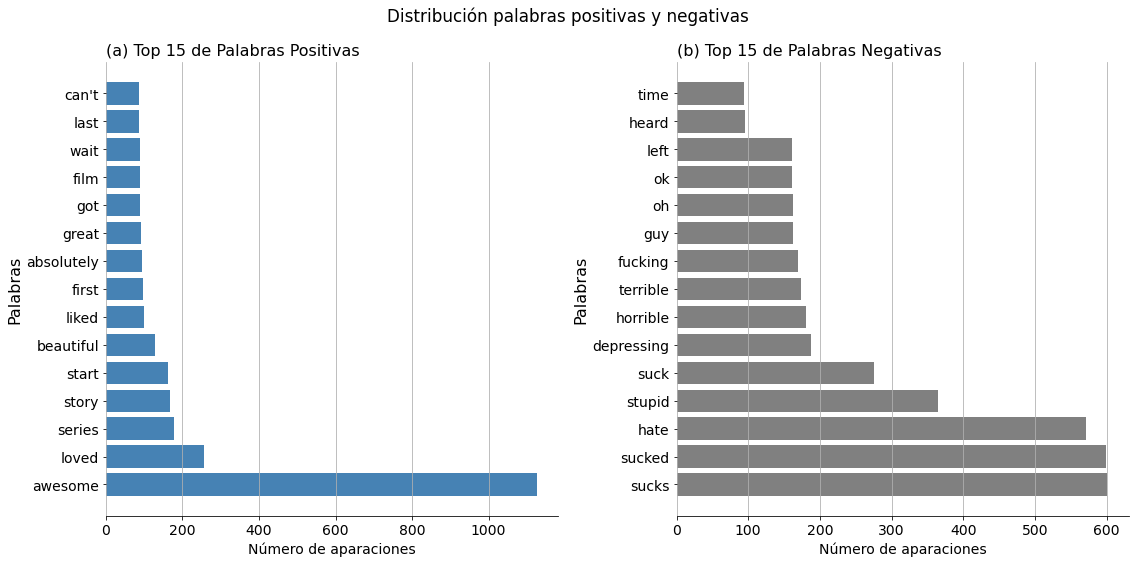

In [24]:
# IMPLEMENTA AQUÍ TU CÓDIGO

#Preparamos los datos para mostralos en las gráficas. Por que sea más visualizables los datos, vamos a tomar las 15 palabras
#que más aparecen por cada uno de los sentimientos positivos y negativos. Y las ordenamos de menor número de aparaciones
#a mayor número.

conjunto_positivas_filtradas_df = pd.DataFrame(
    conjunto_positivas_filtradas).rename(columns={0: "word", 1: "times"})
conjunto_positivas_filtradas_df = conjunto_positivas_filtradas_df.sort_values(
    by="times", ascending=False)[:15]  

conjunto_negativas_filtradas_df = pd.DataFrame(
    conjunto_negativas_filtradas).rename(columns={0: "word", 1: "times"})
conjunto_negativas_filtradas_df = conjunto_negativas_filtradas_df.sort_values(
    by="times", ascending=False)[:15]  


# Creamos las gráficas
fig, axs = plt.subplots(1, 2, sharey=False, tight_layout=True, figsize=(16, 8))
# Creamos un diagrama de barras
axs[0].barh(conjunto_positivas_filtradas_df['word'],
            conjunto_positivas_filtradas_df['times'], color='steelblue')
axs[1].barh(conjunto_negativas_filtradas_df['word'],
            conjunto_negativas_filtradas_df['times'], color='gray')

# Eliminamos la cuadrícula
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
# axs[0].spines['bottom'].set_visible(False)
axs[0].spines['left'].set_visible(False)

axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
# axs[1].spines['bottom'].set_visible(False)
axs[1].spines['left'].set_visible(False)

# Añadimos líneas horizontales blancas que partan nuestra figura.
axs[0].grid(True, axis='x')
axs[1].grid(True, axis='x')

axs[0].set_title('(a) Top 15 de Palabras Positivas ',
                 loc='left', fontdict={'size': 16})
axs[0].set_ylabel('Palabras', fontdict={'size': 16})
axs[0].set_xlabel('Número de aparaciones')

axs[1].set_title('(b) Top 15 de Palabras Negativas ',
                 loc='left', fontdict={'size': 16})
axs[1].set_ylabel('Palabras', fontdict={'size': 16})
axs[1].set_xlabel('Número de aparaciones')

# Etiquetamos la figura.
fig.suptitle('Distribución palabras positivas y negativas')

* Los resultados que se observan en las gráficas son coherentes y reflejan claramente cada uno de los sentimientos. Apareciendo en el top 15 de cada sentimiento, **palabras positivas** como **awesome, loved, beatiful, great** ... . Y en las negativas, palabras bastante **"peyorativas"** como **sucks, sucked, hate, stupid, fucking** ..., etc . 

## Conclusiones

* ¿Qué otras técnicas habrías aplicado?
Hubiera intentado disminuir el número de palabras agrupando o considerando como una aquellas que son similares bien por que tienen el mismo significado, como **loved, beatifull** ... o bien por que comparten una parte común **suck, sucked, suck**... . O también elminar aquellas que sin ser **stopwords** en este contexto no determinan claramente el sentimiento, como por ejemplo **start, first, film** ...


* ¿Cuál crees que sería el siguiente paso?

 Introducir la "inteligencia" a este procesado mediante algún tipo de algoritmo, para que pueda determinar y cocluir por si mismo lo indicado en la pregunta anterior, es decir segnificados comunes o similares, si aportan valor en el contexto que se encuentran..., etc.